<a href="https://colab.research.google.com/github/Prasannnnn/Real-Time-Share-Price-Scraping-and-Analysis/blob/main/Real_Time_Share_price_Scraping_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [15]:
top_10_stocks = ["RELIANCE", "TCS", "INFY", "HDFCBANK", "ICICIBANK",
                 "HINDUNILVR", "KOTAKBANK", "ITC", "DRREDDY", "BAJFINANCE"]

In [20]:
def scrape_screener(stock):
    url = f"https://www.screener.in/company/{stock}/"
    headers = {'User-Agent': 'Mozilla/5.0'}

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    def extract_value(label):
        try:
            tag = soup.find(string=lambda text: text and label in text)
            if tag:
                value = tag.parent.find_next(class_='number')
                return value.text.strip() if value else 'N/A'
        except:
            return 'N/A'
        return 'N/A'

    return {
        'Stock': stock,
        'Market Cap': extract_value("Market Cap"),
        'Current Price': extract_value("Current Price"),
        'High / Low': extract_value("High / Low"),
        'Stock P/E': extract_value("Stock P/E"),
        'Book Value': extract_value("Book Value"),
        'Dividend Yield': extract_value("Dividend Yield"),
        'ROCE': extract_value("ROCE"),
        'ROE': extract_value("ROE"),
        'Face Value': extract_value("Face Value")
    }



In [21]:
# Scrape Data for All 10 Stocks
stock_data = [scrape_screener(stock) for stock in top_10_stocks]
df = pd.DataFrame(stock_data)

# Convert Data to Numeric
df.replace('N/A', None, inplace=True)
for col in df.columns[1:]:
    df[col] = df[col].str.replace(',', '').astype(float)

# Display Data
print("✅ Stock Data Scraped Successfully!")
display(df)

✅ Stock Data Scraped Successfully!


,Stock,Market Cap,Current Price,High / Low,Stock P/E,Book Value,Dividend Yield,ROCE,ROE,Face Value
0,RELIANCE,1661641.0,1227.0,1609.0,47.0,387.0,0.41,9.60,8.42,10.0
1,TCS,1370447.0,3784.0,4592.0,28.4,231.0,1.45,74.80,60.40,1.0
2,INFY,752077.0,1811.0,2007.0,27.4,194.0,2.10,46.20,36.60,5.0
3,HDFCBANK,1321764.0,1727.0,1880.0,20.0,580.0,1.13,7.54,16.90,1.0
4,ICICIBANK,891254.0,1262.0,1362.0,19.7,339.0,0.79,7.51,18.60,2.0
5,HINDUNILVR,528798.0,2250.0,3035.0,51.7,215.0,1.87,27.20,20.10,1.0
6,KOTAKBANK,394626.0,1985.0,1995.0,27.5,487.0,0.10,7.24,15.30,5.0
7,ITC,508570.0,406.0,495.0,25.5,58.3,3.38,37.50,29.20,1.0
8,DRREDDY,97245.0,1166.0,1421.0,18.8,322.0,0.69,25.20,19.20,1.0
9,BAJFINANCE,523434.0,8439.0,8663.0,37.0,1280.0,0.43,12.30,20.50,2.0


In [22]:
def sentiment_analysis(row):
    text = f"Stock P/E: {row['Stock P/E']}, ROCE: {row['ROCE']}, Dividend Yield: {row['Dividend Yield']}"
    sentiment = TextBlob(text).sentiment.polarity

    if sentiment > 0.2:
        return "BUY ✅"
    elif sentiment < -0.2:
        return "SELL ❌"
    else:
        return "WAIT ⚠️"

In [23]:
df["Investment Suggestion"] = df.apply(sentiment_analysis, axis=1)
display(df[['Stock', 'Investment Suggestion']])

,Stock,Investment Suggestion
0,RELIANCE,WAIT ⚠️
1,TCS,WAIT ⚠️
2,INFY,WAIT ⚠️
3,HDFCBANK,WAIT ⚠️
4,ICICIBANK,WAIT ⚠️
5,HINDUNILVR,WAIT ⚠️
6,KOTAKBANK,WAIT ⚠️
7,ITC,WAIT ⚠️
8,DRREDDY,WAIT ⚠️
9,BAJFINANCE,WAIT ⚠️


<ipython-input-24-7f2e215936b5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Stock'], y=df['Market Cap'], palette="coolwarm")


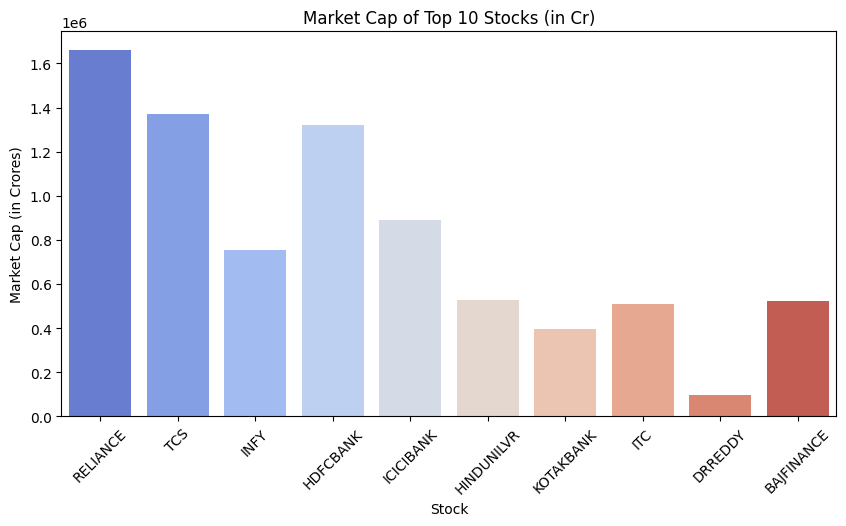

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Stock'], y=df['Market Cap'], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Market Cap of Top 10 Stocks (in Cr)")
plt.xlabel("Stock")
plt.ylabel("Market Cap (in Crores)")
plt.show()

<ipython-input-25-241709d68e18>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Stock'], y=df['Stock P/E'], palette="viridis")


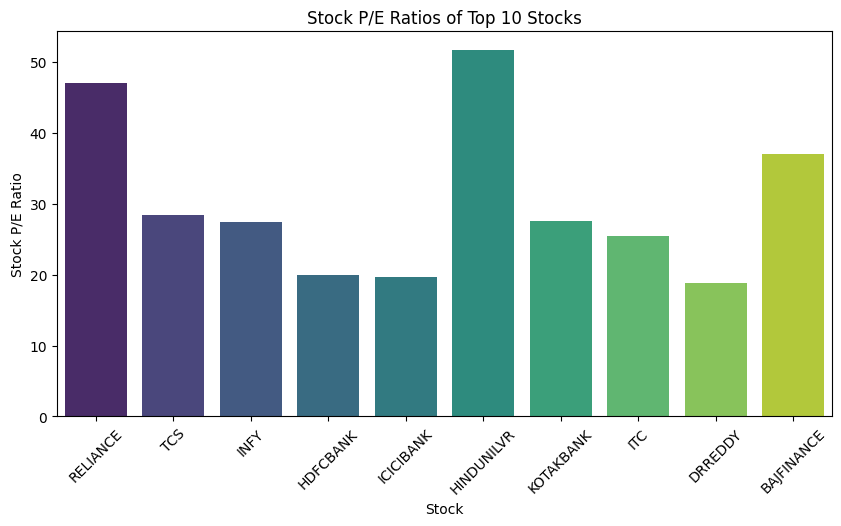

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Stock'], y=df['Stock P/E'], palette="viridis")
plt.xticks(rotation=45)
plt.title("Stock P/E Ratios of Top 10 Stocks")
plt.xlabel("Stock")
plt.ylabel("Stock P/E Ratio")
plt.show()

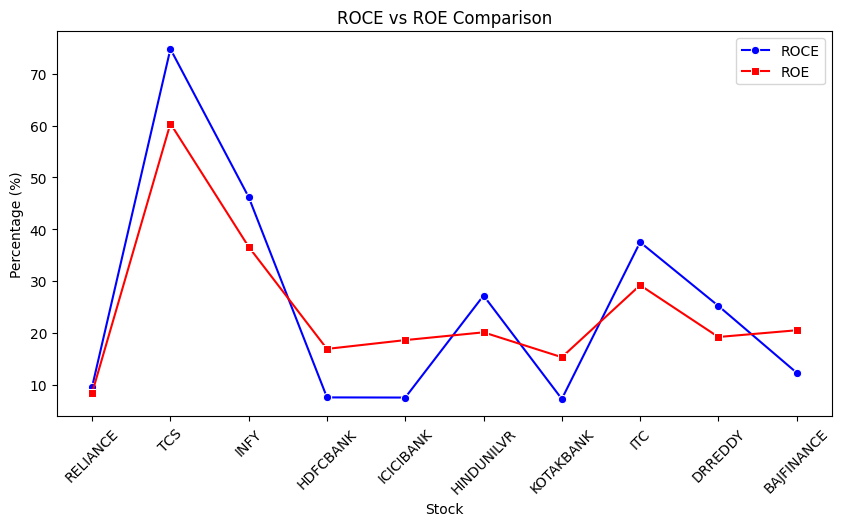

In [26]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['Stock'], y=df['ROCE'], marker="o", label="ROCE", color="blue")
sns.lineplot(x=df['Stock'], y=df['ROE'], marker="s", label="ROE", color="red")
plt.xticks(rotation=45)
plt.title("ROCE vs ROE Comparison")
plt.xlabel("Stock")
plt.ylabel("Percentage (%)")
plt.legend()
plt.show()

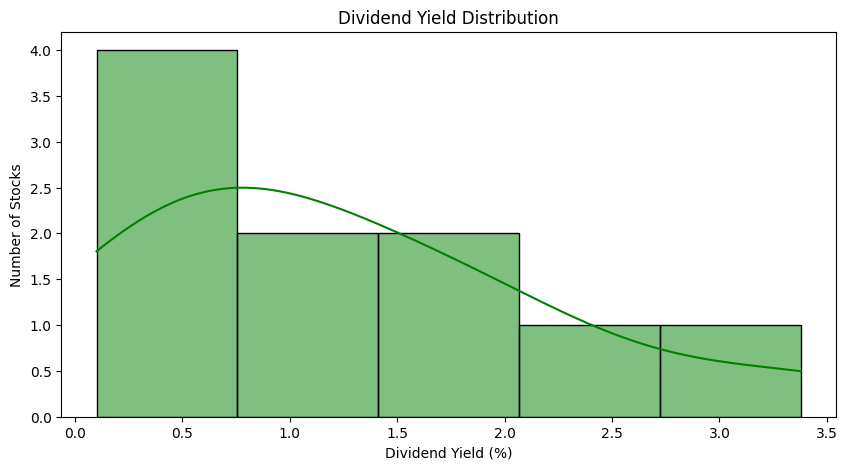

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Dividend Yield'], bins=5, kde=True, color="green")
plt.title("Dividend Yield Distribution")
plt.xlabel("Dividend Yield (%)")
plt.ylabel("Number of Stocks")
plt.show()

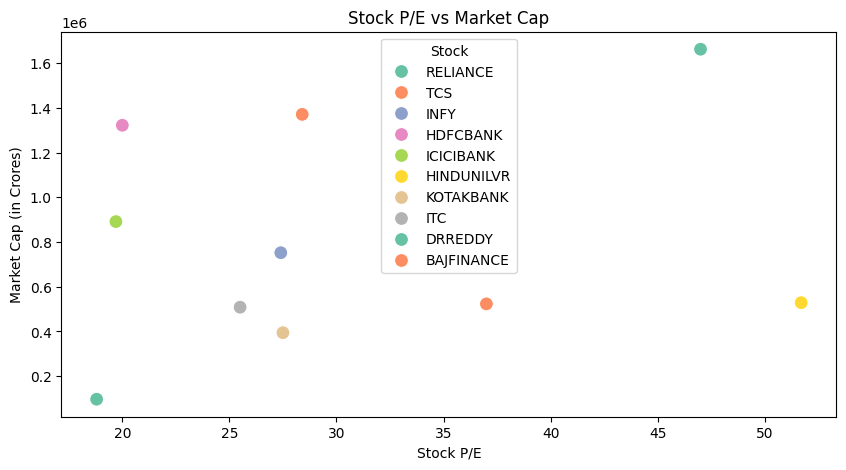

In [28]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Stock P/E'], y=df['Market Cap'], hue=df['Stock'], palette="Set2", s=100)
plt.title("Stock P/E vs Market Cap")
plt.xlabel("Stock P/E")
plt.ylabel("Market Cap (in Crores)")
plt.show()

<ipython-input-29-596c6927686f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Stock'], y=df['Face Value'], palette="coolwarm")


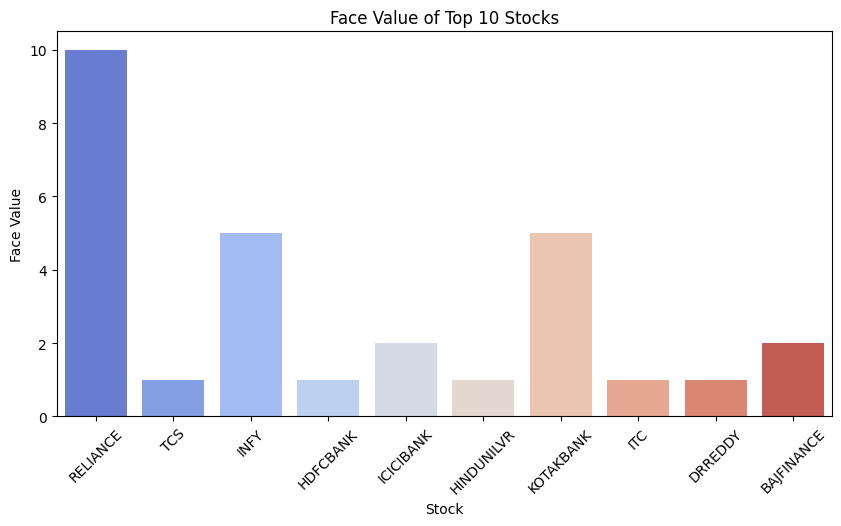

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Stock'], y=df['Face Value'], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Face Value of Top 10 Stocks")
plt.xlabel("Stock")
plt.ylabel("Face Value")
plt.show()

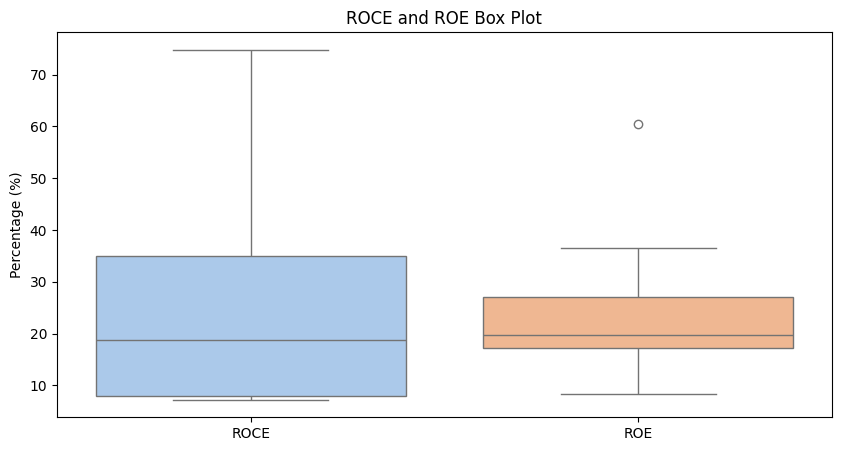

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['ROCE', 'ROE']], palette="pastel")
plt.title("ROCE and ROE Box Plot")
plt.ylabel("Percentage (%)")
plt.show()

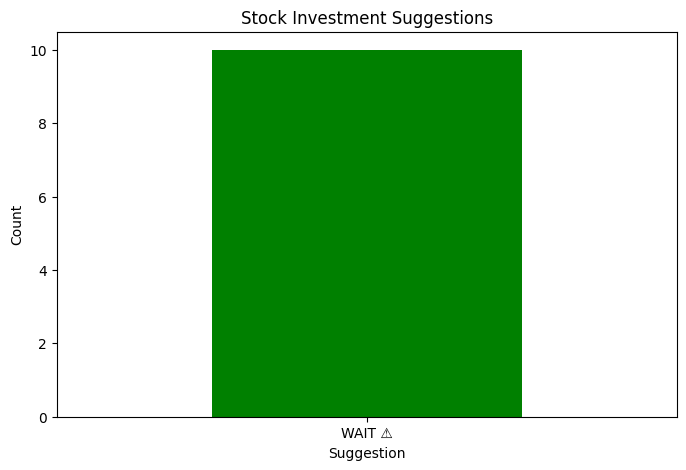

In [31]:
plt.figure(figsize=(8, 5))
df["Investment Suggestion"].value_counts().plot(kind="bar", color=["green", "yellow", "red"])
plt.title("Stock Investment Suggestions")
plt.xlabel("Suggestion")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()